In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
nrep = 50
n = 32
nobs = 5
condpexpsim = np.log(np.load("data/mwe/ref_image1/preprocessed_conditional_simulations_powexp_range_3_smooth_1.6.npy"))
condpexpobs = np.log(np.load("data/mwe/ref_image1/observed_simulation_powexp_range_3_smooth_1.6.npy"))
mask = (np.load("data/mwe/ref_image1/mask.npy"))
seed_value = (np.load("data/mwe/ref_image1/seed_value.npy"))

In [32]:
def process_rproducts(mask, observation, conditional_simulations, nrep, n):

    condsim = np.zeros((nrep, (n**2)))
    condsim[:,mask == 0] = conditional_simulations
    obs = observation.reshape((1,n**2))
    condsim[:,mask == 1] = (np.repeat(obs[:,mask ==1], repeats = nrep, axis = 0))
    
    #shape to matrices
    condsim = condsim.reshape((nrep,n,n))
    observation = observation.reshape((n,n))
    mask = mask.reshape((n,n))
    return mask, observation, condsim

In [33]:
mask, condpexpobs, condsim = process_rproducts(mask, condpexpobs, condpexpsim, nrep, n)

ValueError: shape mismatch: value array of shape (250,) could not be broadcast to indexing result of shape (50,5)

In [24]:
condpexpsims = np.zeros((nrep,n**2))
condpexpsims[:,mask == 1] = np.repeat((condpexpobs.reshape((1,n**2)))[:,mask == 1], nrep, axis = 0)
condpexpsims[:,mask == 0] = condpexpsim

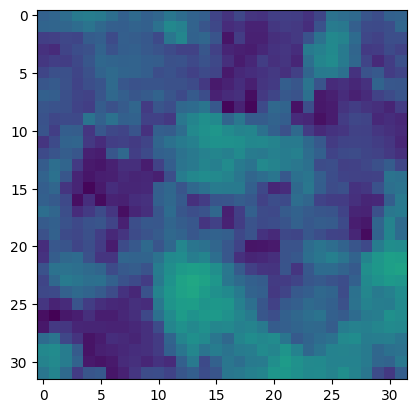

In [27]:
plt.imshow(condpexpobs.reshape((n,n)), vmin = -2, vmax = 4)
plt.show()

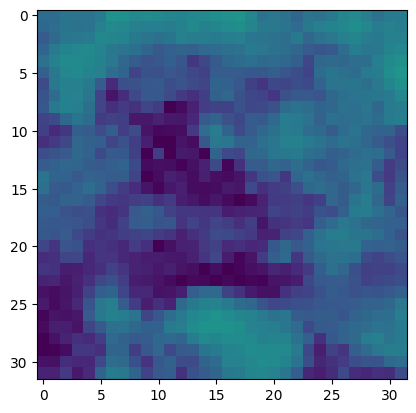

In [29]:
plt.imshow((condpexpsims[1,:]).reshape((n,n)), vmin = -2, vmax = 4)
plt.show()